**Initialisation and Importing libraries**

In [ ]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import  pandas as pd
from pprint import pprint
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
client_id = 'e8ca9757aa69407996ac0c36007e3330'
client_secret = '630b73fd655c4aaaa7fc67e6efdea88b'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
playlist_id= '37i9dQZF1DWVcxviNmmf1D'
playlist = sp.user_playlist(user=None, playlist_id = playlist_id,
                            fields='name, tracks.items.track(name,id,album(release_date),duration_ms,artists,popularity,explicit)')
print("Playlist name:", playlist['name'])
track_id, track_name, release_date, duration_ms,artists = [], [],[],[],[]
danceability, energy, key, loudness,popularity,explicit = [],[],[],[],[],[]
mode, speechiness,instrumentalness, liveness, valence, tempo = [],[], [],[],[],[]
print(playlist)
for track in playlist['tracks']['items']:
  track_id.append(track['track']['id'])
  track_name.append(track['track']['name'])
  release_date.append(track['track']['album']['release_date'])
  duration_ms.append(track['track']['duration_ms'])
  popularity.append(track['track']['popularity'])
  explicit.append(track['track']['explicit'])

  artist = sp.artist(track['track']['artists'][0]['id'])
  artists.append(artist['name'])

  audio_features = sp.audio_features(track['track']['id'])[0]
  danceability.append(audio_features['danceability'])
  energy.append(audio_features['energy'])
  key.append(audio_features['key'])
  loudness.append(audio_features['loudness'])
  mode.append(audio_features['mode'])
  speechiness.append(audio_features['speechiness'])
  instrumentalness.append(audio_features['instrumentalness'])
  liveness.append(audio_features['liveness'])
  valence.append(audio_features['valence'])
  tempo.append(audio_features['tempo'])
  
  

  
  

print(loudness)

                            

Playlist name: Top Tracks of 2022 Ghana
{'name': 'Top Tracks of 2022 Ghana', 'tracks': {'items': [{'track': {'album': {'release_date': '2022-07-07'}, 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3wcj11K77LjEY1PkEazffa'}, 'href': 'https://api.spotify.com/v1/artists/3wcj11K77LjEY1PkEazffa', 'id': '3wcj11K77LjEY1PkEazffa', 'name': 'Burna Boy', 'type': 'artist', 'uri': 'spotify:artist:3wcj11K77LjEY1PkEazffa'}], 'duration_ms': 172342, 'explicit': False, 'id': '5YbPxJwPfrj7uswNwoF1pJ', 'name': 'Last Last', 'popularity': 78}}, {'track': {'album': {'release_date': '2022-05-13'}, 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5JWBXFlYkBy3n2oN1To790'}, 'href': 'https://api.spotify.com/v1/artists/5JWBXFlYkBy3n2oN1To790', 'id': '5JWBXFlYkBy3n2oN1To790', 'name': 'Mavins', 'type': 'artist', 'uri': 'spotify:artist:5JWBXFlYkBy3n2oN1To790'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3Uv5hfyuC7TkLsQ6p4ikSb'}, 'href': 'https:/

In [ ]:
#audio features
features = ['track_id', 'track_name', 'release_date', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
 'mode', 'speechiness','instrumentalness', 'liveness', 'valence', 'tempo']

df = pd.DataFrame({'track_id': track_id, 'track_name': track_name, 'artist_name': artists, 'release_date': release_date,
                    'duration_ms': duration_ms, 'popularity': popularity, 'explicit': explicit, 'danceability':danceability, 'energy': energy, 'key':key,
                    'loudness':loudness, 'mode':mode, 'speechiness':speechiness,
                    'instrumentalness': instrumentalness, 'liveness':liveness, 'valence': valence,
                    'tempo':tempo})





In [ ]:
df.head()

,track_id,track_name,artist_name,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
0,5YbPxJwPfrj7uswNwoF1pJ,Last Last,Burna Boy,2022-07-07,172342,78,False,0.795,0.565,3,-4.457,0,0.0948,0.00000,0.0802,0.550,87.925
1,4lVEVXrlQlXPdYWMGTwrFe,Overloading (OVERDOSE),Mavins,2022-05-13,205000,66,False,0.546,0.611,0,-9.459,0,0.1720,0.00149,0.1010,0.749,104.059
2,2LqvzGaZniHiZ9CXhzkclD,Kwaku The Traveller,Black Sherif,2022-10-05,185364,57,True,0.640,0.552,0,-7.327,0,0.3540,0.00000,0.1070,0.318,135.241
3,4Gasn91fsCefnN8zM5GjA8,Finesse,Pheelz,2022-03-03,155293,73,False,0.859,0.551,1,-7.916,0,0.1490,0.00000,0.1940,0.777,102.049
4,2qWwuCVeMjF9mUT0S5Iqvl,Bandana,Fireboy DML,2022-08-04,178225,70,True,0.818,0.605,1,-7.121,1,0.0380,0.01160,0.0696,0.366,104.931


In [ ]:
df['duration_ms'] = ((df['duration_ms']/1000)/60).round(2)
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.head()

,track_id,track_name,artist_name,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
0,5YbPxJwPfrj7uswNwoF1pJ,Last Last,Burna Boy,2022-07-07,2.87,78,False,0.795,0.565,3,-4.457,0,0.0948,0.00000,0.0802,0.550,87.925
1,4lVEVXrlQlXPdYWMGTwrFe,Overloading (OVERDOSE),Mavins,2022-05-13,3.42,66,False,0.546,0.611,0,-9.459,0,0.1720,0.00149,0.1010,0.749,104.059
2,2LqvzGaZniHiZ9CXhzkclD,Kwaku The Traveller,Black Sherif,2022-10-05,3.09,57,True,0.640,0.552,0,-7.327,0,0.3540,0.00000,0.1070,0.318,135.241
3,4Gasn91fsCefnN8zM5GjA8,Finesse,Pheelz,2022-03-03,2.59,73,False,0.859,0.551,1,-7.916,0,0.1490,0.00000,0.1940,0.777,102.049
4,2qWwuCVeMjF9mUT0S5Iqvl,Bandana,Fireboy DML,2022-08-04,2.97,70,True,0.818,0.605,1,-7.121,1,0.0380,0.01160,0.0696,0.366,104.931


In [ ]:
df.nunique()

track_id            50
track_name          49
artist_name         32
release_date        36
duration_ms         43
popularity          27
explicit             2
danceability        45
energy              48
key                 12
loudness            50
mode                 2
speechiness         48
instrumentalness    30
liveness            47
valence             49
tempo               48
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          50 non-null     object        
 1   track_name        50 non-null     object        
 2   artist_name       50 non-null     object        
 3   release_date      50 non-null     datetime64[ns]
 4   duration_ms       50 non-null     float64       
 5   popularity        50 non-null     int64         
 6   explicit          50 non-null     bool          
 7   danceability      50 non-null     float64       
 8   energy            50 non-null     float64       
 9   key               50 non-null     int64         
 10  loudness          50 non-null     float64       
 11  mode              50 non-null     int64         
 12  speechiness       50 non-null     float64       
 13  instrumentalness  50 non-null     float64       
 14  liveness          50 non-nul

In [ ]:
order = df['artist_name'].value_counts().index.tolist()
order

['Black Sherif',
 'Asake',
 'Fireboy DML',
 'Burna Boy',
 'King Promise',
 'Ayra Starr',
 'Joeboy',
 'Camidoh',
 'Kizz Daniel',
 'Pheelz',
 'Future',
 'SPINALL',
 'Samsney',
 'Skiibii',
 'Fave',
 'CKay',
 'Magixx',
 'Davido',
 'Mayorkun',
 'Lojay',
 'Omah Lay',
 'Gyakie',
 'Mavins',
 'Adekunle Gold',
 'Kwesi Arthur',
 'Lasmid',
 'Darkoo',
 'Sarkodie',
 'Rema',
 'Oxlade',
 'Kelvyn Boy',
 'Mr Drew']

In [ ]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.971000,61.160000,0.755060,0.641800,5.640000,-6.609020,0.560000,0.128548,0.015697,0.122312,0.662320,115.055820
std,0.413755,11.753176,0.122062,0.107668,3.532704,1.656896,0.501427,0.085915,0.050045,0.076922,0.171966,23.089052
min,2.220000,35.000000,0.463000,0.415000,0.000000,-10.609000,0.000000,0.038000,0.000000,0.032100,0.242000,83.389000
25%,2.610000,55.250000,0.698500,0.565000,2.000000,-7.669250,0.000000,0.065925,0.000000,0.081075,0.549250,101.246500
50%,2.965000,63.000000,0.795000,0.651500,6.500000,-6.788000,1.000000,0.102500,0.000035,0.101500,0.687000,109.001000
75%,3.155000,69.000000,0.830000,0.711250,8.000000,-5.504500,1.000000,0.155000,0.002038,0.122000,0.798500,116.040750
max,4.190000,85.000000,0.956000,0.865000,11.000000,-2.370000,1.000000,0.354000,0.231000,0.433000,0.961000,202.025000


# **Analysing some Key audio features using kernel density plot**

Text(0.5, 1.0, 'Danceability Density')

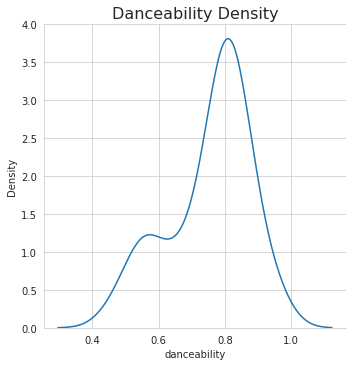

In [ ]:
sns.displot(data=df, x='danceability', kind='kde')
plt.title('Danceability Density', fontsize=16)

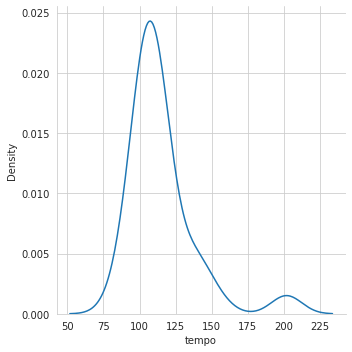

In [ ]:
sns.displot(data=df, x='tempo', kind='kde')


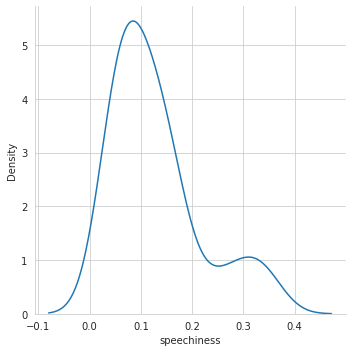

In [ ]:
sns.displot(data=df, x='speechiness', kind='kde')

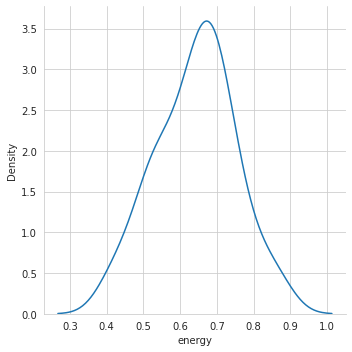

In [ ]:
sns.displot(data=df, x='energy', kind='kde')

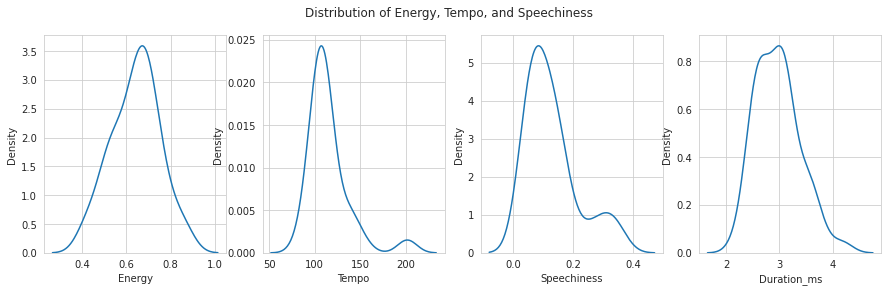

In [ ]:

# Create subplots for each KDE plot
fig, axs = plt.subplots(ncols=4, figsize=(15, 4))

# Plot the KDE plots for energy, tempo, and speechiness
sns.kdeplot(data=df, x='energy', ax=axs[0])
sns.kdeplot(data=df, x='tempo', ax=axs[1])
sns.kdeplot(data=df, x='speechiness', ax=axs[2])
sns.kdeplot(data=df, x='duration_ms', ax=axs[3])

# Set the labels and title for the subplots
axs[0].set(xlabel='Energy')
axs[1].set(xlabel='Tempo')
axs[2].set(xlabel='Speechiness')
axs[3].set(xlabel='Duration_ms')
fig.suptitle('Distribution of Energy, Tempo, and Speechiness')

# Show the plot
plt.show()

In [ ]:
df =  df.sort_values('popularity', ascending=False)
df

,track_id,track_name,artist_name,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
43,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),Future,2022-04-29,3.16,85,True,0.463,0.642,1,-4.474,1,0.3400,0.000000,0.0686,0.339,83.389
7,2WigMwGJysIh9fRnSJvpjn,KU LO SA - A COLORS SHOW,Oxlade,2022-06-10,2.46,80,False,0.649,0.655,10,-5.534,0,0.0652,0.000000,0.2200,0.793,92.900
10,0HaRLPnr887lcQM2YQzkff,For My Hand (feat. Ed Sheeran),Burna Boy,2022-07-07,2.65,79,False,0.870,0.479,9,-7.779,1,0.1650,0.000157,0.2090,0.717,104.059
0,5YbPxJwPfrj7uswNwoF1pJ,Last Last,Burna Boy,2022-07-07,2.87,78,False,0.795,0.565,3,-4.457,0,0.0948,0.000000,0.0802,0.550,87.925
38,1xs8bOvm3IzEYmcLJVOc34,Rush,Ayra Starr,2022-10-21,3.08,78,False,0.792,0.503,1,-8.044,1,0.0626,0.000570,0.0959,0.381,99.970
8,3BnDvpeuGOj21Ir2aVEtQo,Calm Down,Rema,2022-03-24,3.66,78,False,0.814,0.789,11,-6.290,1,0.0405,0.000502,0.1370,0.842,107.003
3,4Gasn91fsCefnN8zM5GjA8,Finesse,Pheelz,2022-03-03,2.59,73,False,0.859,0.551,1,-7.916,0,0.1490,0.000000,0.1940,0.777,102.049
11,5hVjoL3sHepZROri63wBxP,It's Plenty,Burna Boy,2022-07-07,3.62,73,True,0.776,0.565,7,-10.609,1,0.1050,0.000088,0.3080,0.530,107.035
32,6bW7YnPQQffit1iwule5Vv,emiliana,CKay,2022-09-23,2.78,70,False,0.763,0.697,6,-5.735,1,0.0507,0.194000,0.1090,0.485,98.998
24,4tr4oHjFijp0EgISHYDIXe,Sip (Alcohol),Joeboy,2021-09-24,2.64,70,False,0.804,0.615,10,-7.033,0,0.1370,0.000000,0.0987,0.816,100.058


Text(0, 0.5, 'Artist Name')

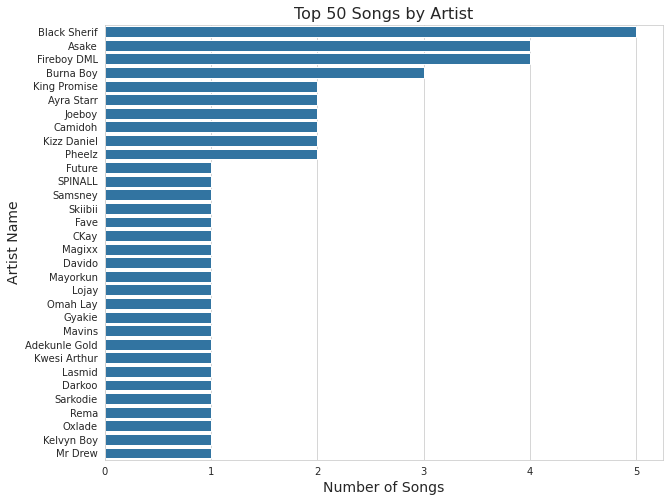

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.countplot(data=df, y='artist_name', color=sns.color_palette()[0], order=order)

plt.title('Top 50 Songs by Artist', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist Name', fontsize=14)




# **Dealing With  Skewed Variables**

In [ ]:
skew_values = df.skew().to_frame().rename(columns={0: 'skew'})
skew_limit = 0.75
skew_cols = skew_values[abs(skew_values['skew']) > skew_limit]

print(skew_cols)




                      skew
danceability     -0.758902
speechiness       1.269014
instrumentalness  3.636222
liveness          2.315992
tempo             2.322796


<ipython-input-61-233c01c771a9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_values = df.skew().to_frame().rename(columns={0: 'skew'})


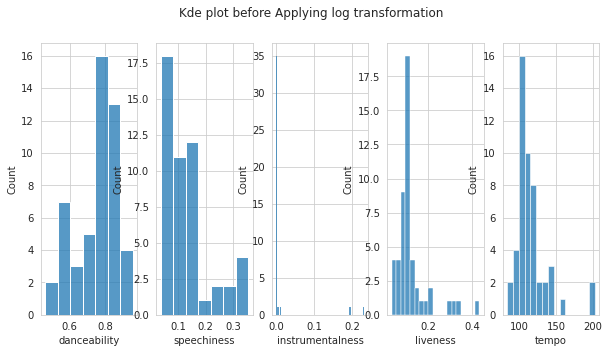

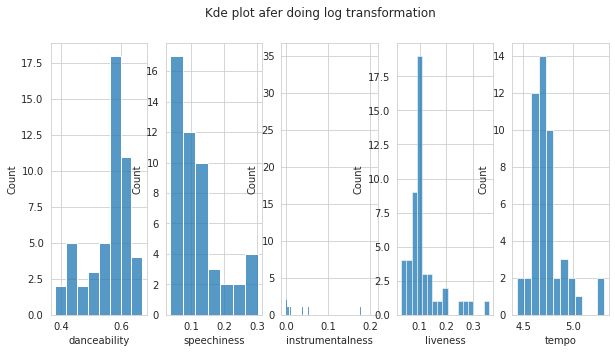

In [ ]:
df_after_log = df.copy()

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 5))
plt.suptitle('Kde plot before Applying log transformation', )
column=0
for col in skew_cols.index:
  sns.histplot(data=df, x=col, ax=axs[ column])
  column +=1


for cols in skew_cols.index:
  df_after_log[cols] = df_after_log[cols].apply(np.log1p)

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 5))
plt.suptitle('Kde plot afer doing log transformation', )
column=0
for col in skew_cols.index:
  sns.histplot(data=df_after_log, x=col, ax=axs[ column])
  column +=1

 

# **Heatmap to show correlation between Attributes**

<Axes: >

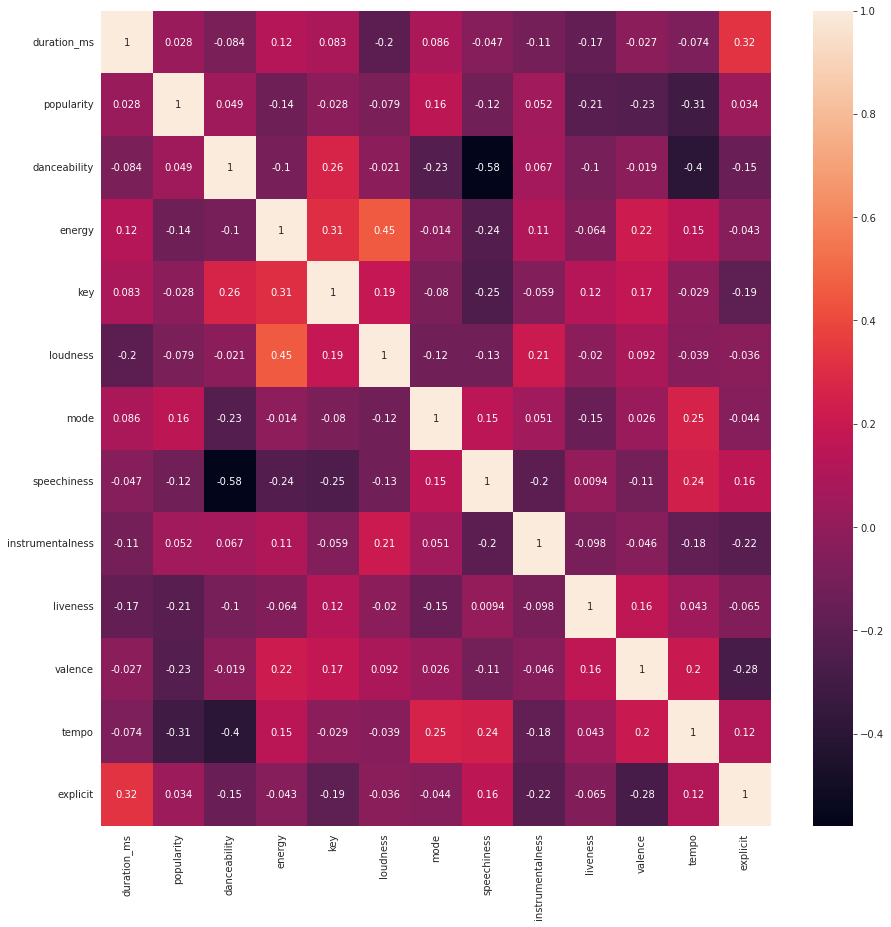

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_after_log.corr(), annot=True)

In [ ]:
df.corr()['popularity']

duration_ms         0.027958
popularity          1.000000
explicit            0.033674
danceability        0.057393
energy             -0.136766
key                -0.027584
loudness           -0.079449
mode                0.157632
speechiness        -0.115877
instrumentalness    0.056679
liveness           -0.223541
valence            -0.231871
tempo              -0.262788
Name: popularity, dtype: float64

# **Drawing Pairplot with target attribute**

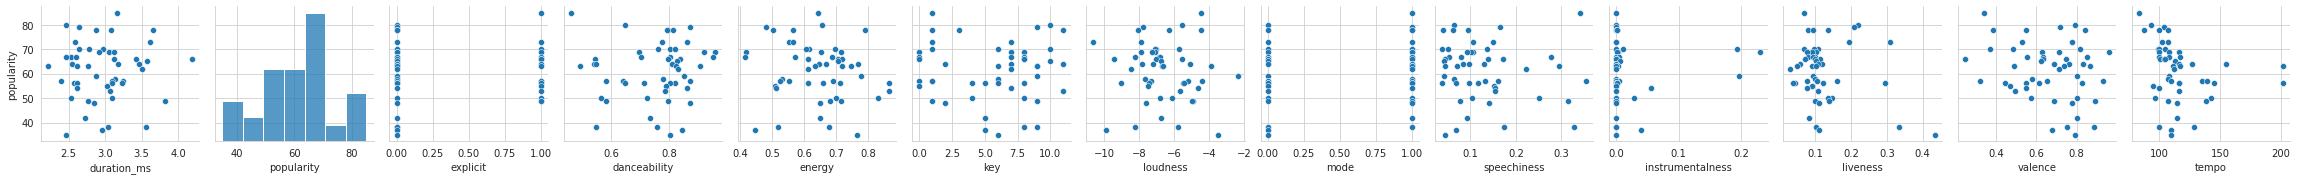

In [ ]:
sns.pairplot(data=df, y_vars='popularity')

# **Converting Categorical Attributes to Numerical Attributes**

In [ ]:
df = pd.get_dummies(data=df, columns=['explicit'], drop_first=True)
df.head()

,track_id,track_name,artist_name,release_date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,explicit_True
43,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),Future,2022-04-29,3.16,85,0.463,0.642,1,-4.474,1,0.3400,0.000000,0.0686,0.339,83.389,1
7,2WigMwGJysIh9fRnSJvpjn,KU LO SA - A COLORS SHOW,Oxlade,2022-06-10,2.46,80,0.649,0.655,10,-5.534,0,0.0652,0.000000,0.2200,0.793,92.900,0
10,0HaRLPnr887lcQM2YQzkff,For My Hand (feat. Ed Sheeran),Burna Boy,2022-07-07,2.65,79,0.870,0.479,9,-7.779,1,0.1650,0.000157,0.2090,0.717,104.059,0
0,5YbPxJwPfrj7uswNwoF1pJ,Last Last,Burna Boy,2022-07-07,2.87,78,0.795,0.565,3,-4.457,0,0.0948,0.000000,0.0802,0.550,87.925,0
38,1xs8bOvm3IzEYmcLJVOc34,Rush,Ayra Starr,2022-10-21,3.08,78,0.792,0.503,1,-8.044,1,0.0626,0.000570,0.0959,0.381,99.970,0


In [ ]:
df.rename(columns={'explicit_True': 'explicit'}, inplace=True)

([<matplotlib.axis.XTick at 0x7fd64fc270a0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

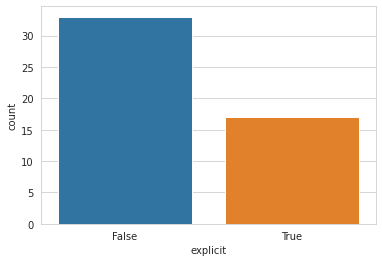

In [ ]:
sns.countplot(data=df, x='explicit')
plt.xticks([0, 1], ['False', 'True'])

Most of the Top 50 songs were not explicit.
